<a href="https://colab.research.google.com/github/Kiran-01/The-Spark-Foundation-Tasks/blob/main/DS_INTERNSHIP_TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR : KIRAN VIJAY NIKUMBH** 








## **TASK 5 :- PREDICTION USING DECISION TREE ALGORITHM**
Create the Decision Tree classifier and visualize it graphically

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# uploading the Dataset

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (3).csv
User uploaded file "Iris.csv" with length 5107 bytes


In [3]:
#Reading the Dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.Species = enc.fit_transform(df.Species)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
# Checking number of unique categories in Species Column
df.Species.unique()

array([0, 1, 2])

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Checking Null values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Splitting our data into Dependent and Independent variables(Data Mapping)

In [9]:
X = df.iloc[:, [1,2,3,4]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


### **Decision Tree Visualization using "gini" as a criterion**




---



In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

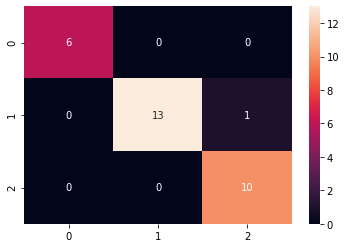

In [13]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [14]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score is {accuracy*100} %')


Accuracy Score is 96.66666666666667 %


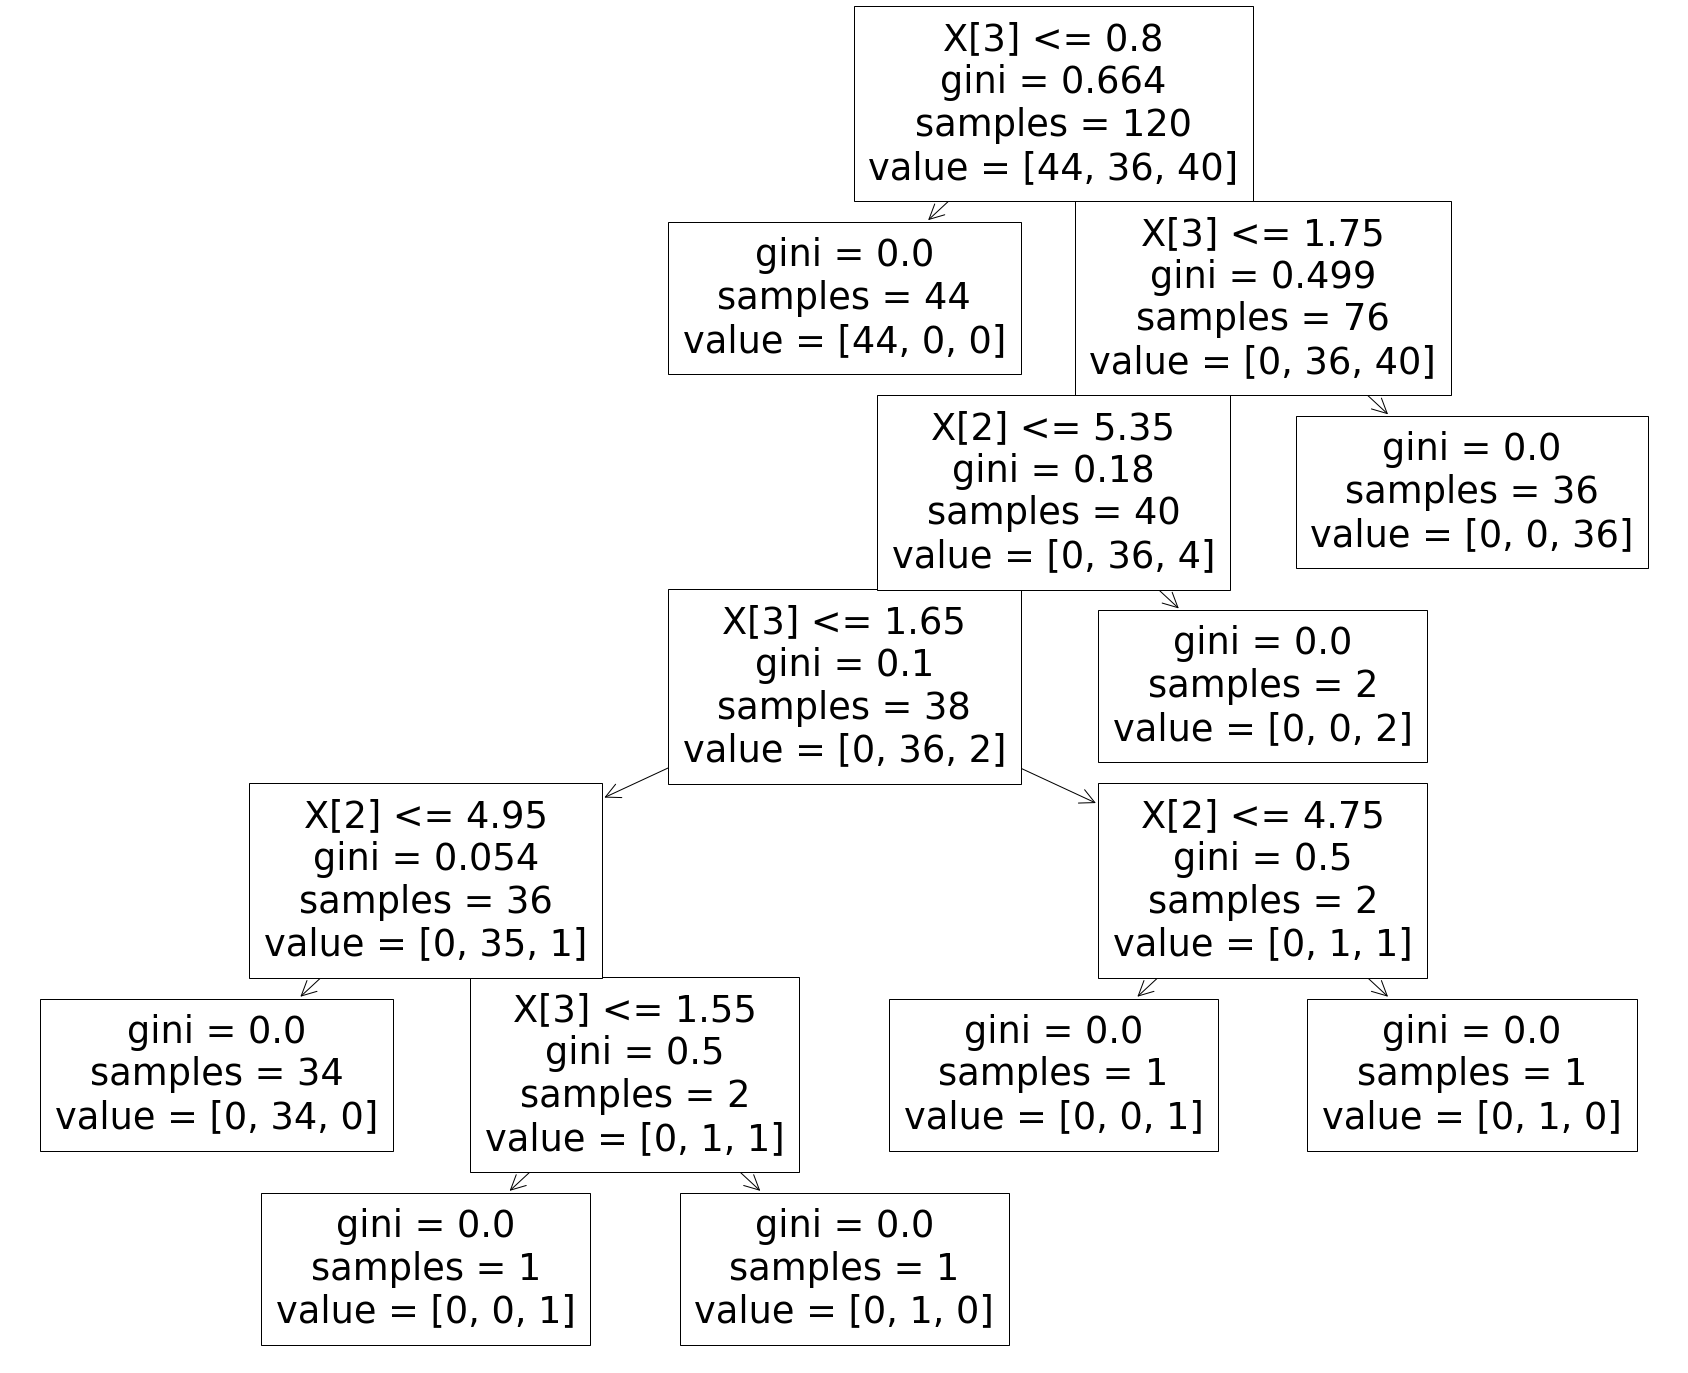

In [15]:
# Visualizing Decision Tree Using 'plot_tree'
from sklearn import tree
plt.figure(figsize=(30,25))
tree.plot_tree(dt)
plt.show()

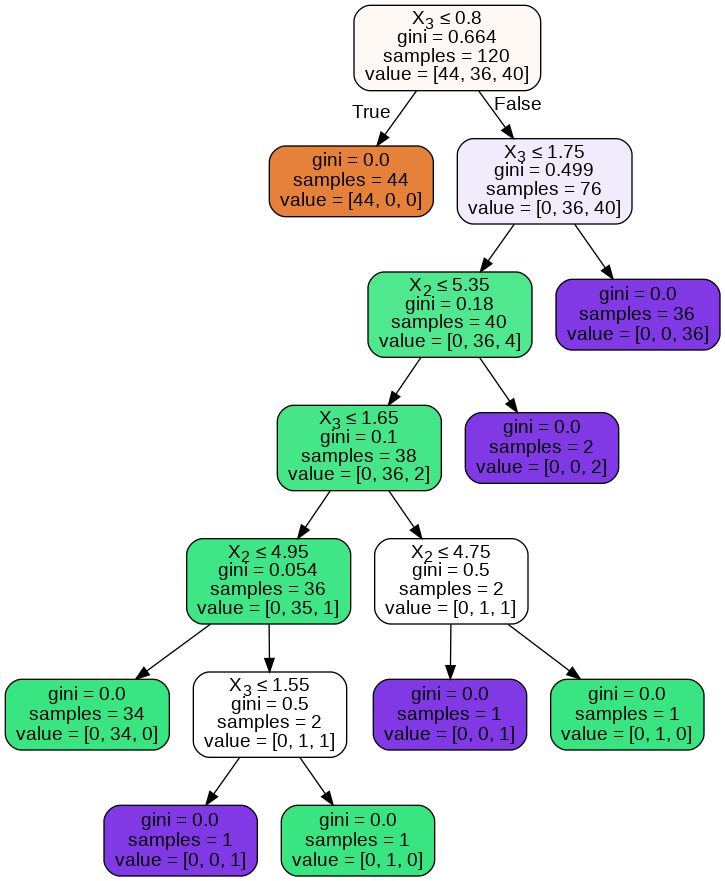

In [16]:
# Visualizing the Decision Tree Using Pydotplus and graphviz
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### **Decision Tree Visualization using "entropy"**

In [17]:
from sklearn.tree  import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion='entropy')
cls.fit(X_train, y_train)

y_pred_cls = cls.predict(X_test)



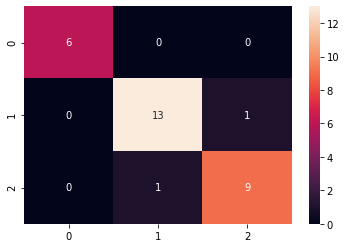

In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_cls)

sns.heatmap(cm, annot = True)



In [19]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_cls)
print(f'Accuracy Score is {accuracy*100} %')

Accuracy Score is 93.33333333333333 %


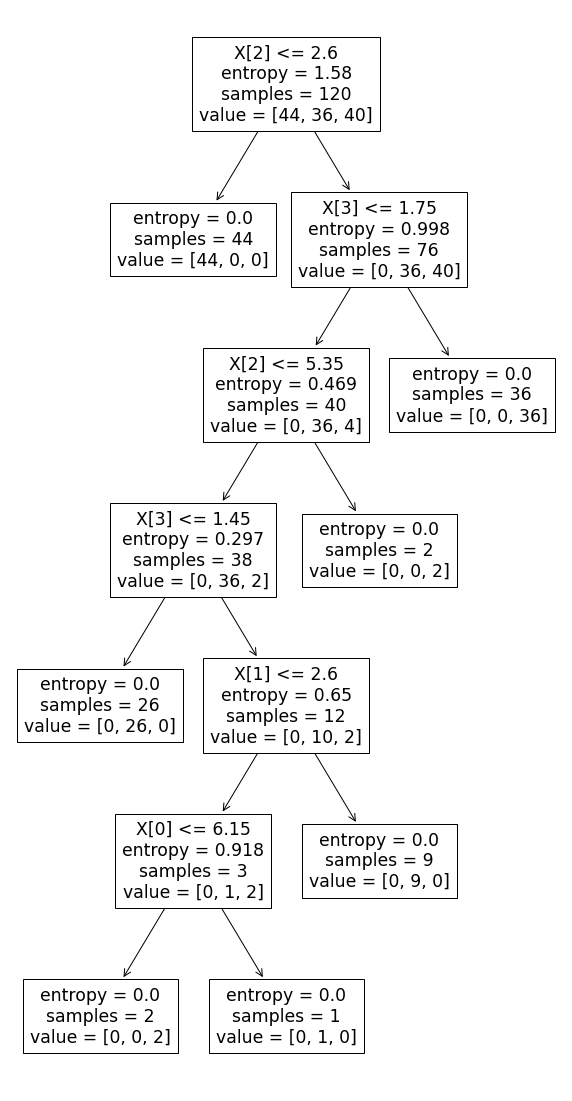

In [20]:
# Visualizing Decision Tree Using 'plot_tree'
from sklearn import tree
plt.figure(figsize=(10,20))
tree.plot_tree(cls)
plt.show()

In [21]:
# Visualizing the Decision Tree Using Pydotplus and graphviz
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image 
dot_data = StringIO()
export_graphviz(cls, out_file=dot_data, feature_names=None,  
                filled=True, rounded=True,
                special_characters=True)


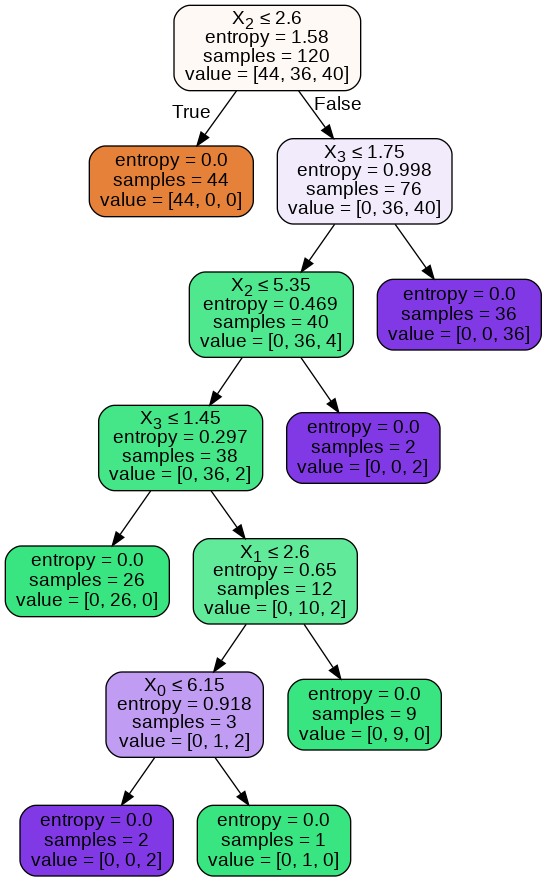

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())